# **Colab   [Click](https://colab.research.google.com/drive/1PhlCHiYpG2q5Y4YGumkjoMa5AFezCpw8?usp=sharing)**

# **Model Building  (ExtraTreesRegressor)**

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)

In [ ]:
model = ExtraTreesRegressor().fit(xtrain,ytrain)

model

ExtraTreesRegressor()

**Accuracy Check**

In [ ]:
y_test_pred  = model.predict(xtest)

r2_testing = r2_score(ytest,y_test_pred)

r2_testing*100

98.26708138489695

### **Prediction**

**Test 1**

In [ ]:
df.loc[10000].tolist()

[16.0,
 90.0,
 0.0,
 18.12,
 2.586,
 26.0,
 2.0,
 2010.0,
 2.0,
 57197.0,
 5480.712700000004,
 1822.1091000000035,
 78.66960000000007,
 1486.1364000000003,
 2779.062700000003,
 189.6018023,
 7.039,
 5302.95]

In [ ]:
x.loc[10000].tolist()

[16.0,
 90.0,
 0.0,
 18.12,
 2.586,
 26.0,
 2.0,
 2010.0,
 2.0,
 57197.0,
 5480.712700000004,
 1822.1091000000035,
 78.66960000000007,
 1486.1364000000003,
 2779.062700000003,
 189.6018023,
 7.039]

In [ ]:
predicted_value = model.predict([x.loc[10000].tolist()])

predicted_value

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


array([5302.95])

**Test 2**

In [ ]:
x.loc[8000].tolist()

[30.0,
 97.0,
 0.0,
 39.75,
 2.514,
 19.0,
 2.0,
 2010.0,
 3.0,
 42988.0,
 560.1677000000001,
 888.5599999999998,
 41.91999999999997,
 141.33440000000022,
 2805.0175999999983,
 210.9451605,
 8.324]

In [ ]:
y.loc[8000]

13058.64

In [ ]:
predicted_value = model.predict([x.loc[8000].tolist()])

predicted_value

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


array([13058.64])

**Test 3:**

In [ ]:
x.loc[55000].tolist()

[32.0,
 2.0,
 0.0,
 70.86,
 2.684,
 11.0,
 6.0,
 2010.0,
 1.0,
 203007.0,
 14109.146400000003,
 221.94190000000003,
 43.77849999999996,
 3545.2662999999984,
 5765.758299999995,
 189.4000734,
 8.963]

In [ ]:
y.loc[55000].tolist()

50918.38

In [ ]:
predicted_value = model.predict([x.loc[55000].tolist()])

predicted_value

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


array([50918.38])

**Final Test**

In [ ]:
data = x.loc[[10000,8000,55000]]
data

,Store,Dept,IsHoliday,Temperature,Fuel_Price,Day,Month,Year,Type,Size,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
10000,16,90,0,18.12,2.586,26,2,2010,2,57197,5480.7127,1822.1091,78.6696,1486.1364,2779.0627,189.601802,7.039
8000,30,97,0,39.75,2.514,19,2,2010,3,42988,560.1677,888.5600,41.9200,141.3344,2805.0176,210.945160,8.324
55000,32,2,0,70.86,2.684,11,6,2010,1,203007,14109.1464,221.9419,43.7785,3545.2663,5765.7583,189.400073,8.963


In [ ]:
actual = [y.loc[10000],y.loc[8000],y.loc[55000]]
actual

[5302.95, 13058.64, 50918.38]

In [ ]:
predicted = model.predict(data)

predicted

array([ 5302.95    , 13760.183169, 50254.7555  ])

### **Plot**

Difference : [-7.275957614183426e-12, -701.5431690000096, 663.6245000000199]



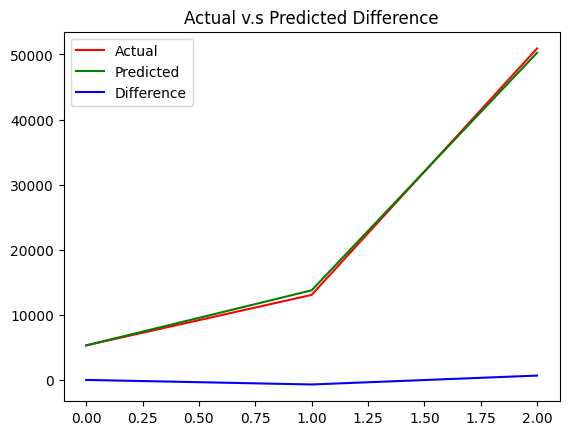

In [ ]:
difference = [actual[i]-predicted[i] for i in range(len(actual))]

print(f'Difference : {difference}')

print()

plt.plot(actual,label='Actual',color='r')
plt.plot(predicted,label='Predicted',color='g')
plt.plot(difference,label='Difference',color='b')
plt.legend()

plt.title('Actual v.s Predicted Difference')
plt.show()



```
Note : The difference b.w actual and predicted is low (2%)

```



### **Feature Importance**

In [ ]:
importance = model.feature_importances_
importance

array([0.04018872, 0.73314955, 0.00308391, 0.00790911, 0.00283638,
       0.00662044, 0.01705309, 0.00382283, 0.03234079, 0.09268139,
       0.00315659, 0.00263434, 0.02044777, 0.00345366, 0.00259665,
       0.01969483, 0.00832996])

In [ ]:
feature = [i for i in x.columns]
feature

['Store',
 'Dept',
 'IsHoliday',
 'Temperature',
 'Fuel_Price',
 'Day',
 'Month',
 'Year',
 'Type',
 'Size',
 'MarkDown1',
 'MarkDown2',
 'MarkDown3',
 'MarkDown4',
 'MarkDown5',
 'CPI',
 'Unemployment']

In [ ]:
feature_importance = {}

for i in range(len(feature)):
     feature_importance.update({feature[i]:importance[i]*100})

feature_importance

{'Store': 4.018871644716872,
 'Dept': 73.31495507698679,
 'IsHoliday': 0.3083906597249284,
 'Temperature': 0.7909113405780618,
 'Fuel_Price': 0.28363787401610946,
 'Day': 0.6620442440031789,
 'Month': 1.7053091950883892,
 'Year': 0.3822828532404087,
 'Type': 3.2340786770938967,
 'Size': 9.268138616390127,
 'MarkDown1': 0.31565883333140615,
 'MarkDown2': 0.2634338165841277,
 'MarkDown3': 2.044776773704312,
 'MarkDown4': 0.34536648670682507,
 'MarkDown5': 0.25966467210987465,
 'CPI': 1.9694833593606995,
 'Unemployment': 0.8329958763639804}

In [ ]:
sorted_feature_importance  = dict(sorted(feature_importance.items(),key=lambda item : item[1],reverse=True))
sorted_feature_importance

{'Dept': 73.31495507698679,
 'Size': 9.268138616390127,
 'Store': 4.018871644716872,
 'Type': 3.2340786770938967,
 'MarkDown3': 2.044776773704312,
 'CPI': 1.9694833593606995,
 'Month': 1.7053091950883892,
 'Unemployment': 0.8329958763639804,
 'Temperature': 0.7909113405780618,
 'Day': 0.6620442440031789,
 'Year': 0.3822828532404087,
 'MarkDown4': 0.34536648670682507,
 'MarkDown1': 0.31565883333140615,
 'IsHoliday': 0.3083906597249284,
 'Fuel_Price': 0.28363787401610946,
 'MarkDown2': 0.2634338165841277,
 'MarkDown5': 0.25966467210987465}

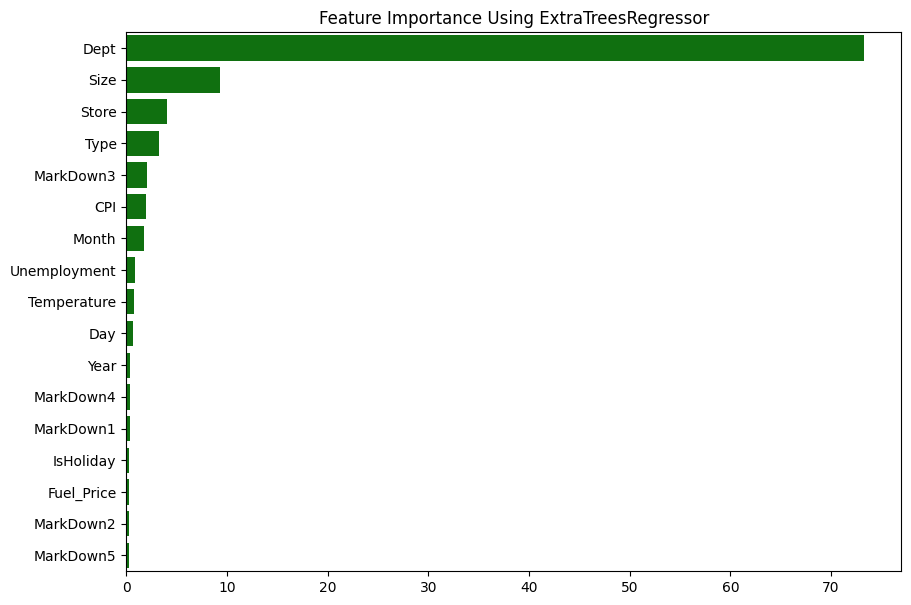

In [ ]:
plt.figure(figsize=(10,7))
sns.barplot(x=[i for i in sorted_feature_importance.values()],y=[i for i in sorted_feature_importance.keys()],color='g').set(title='Feature Importance Using ExtraTreesRegressor')
plt.show()

### **Pickle File**

In [ ]:
import pickle

import sklearn

sklearn.__version__

'1.2.2'

**Download The Model**

In [ ]:
with open('regressor_model.pkl','wb') as f:
  pickle.dump(model,f)